#Bibliotecas e autenticação

In [1]:
!pip install -U -q PyDrive

In [2]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id': '1-EL5jV5m_7zJi-rKgDXMAcCSrTGkq7z2'})
downloaded.GetContentFile('not_client.csv')
downloaded = drive.CreateFile({'id': '1-C4iOW6z7oAtWCHhwuC-IeTxp8COwbxj'})
downloaded.GetContentFile('client.csv')

In [5]:
not_client = pd.read_csv('not_client.csv')
client = pd.read_csv('client.csv')

#Modelos Novo cliente











##Divisão entre dados de treinamento e teste

In [6]:
from sklearn.model_selection import train_test_split

cols = ['vlr_credito', 'vlr_renda', 'qtd_restr']

# Dividindo x e y
x = not_client[cols]
y = not_client['ind_novo_cli']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 50)

In [7]:
not_client[cols].head()

,vlr_credito,vlr_renda,qtd_restr
0,0.000100,0.002846,0.00000
1,0.000000,0.020181,0.00463
2,0.000220,0.001294,0.00463
3,0.000565,0.016300,0.00000
4,0.000000,0.004916,0.00000


##KNN 

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn_n = KNeighborsClassifier(n_neighbors=23)
kn_n.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [9]:
y_pred_knn = kn_n.predict(x_test)
y_pred_knn

array([0., 0., 0., ..., 0., 0., 0.])

###Metricas

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

0.8131543397500844

In [11]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_knn)

0.6700949367088608

In [12]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_knn)

0.6440085158150851

###Matriz de confusão

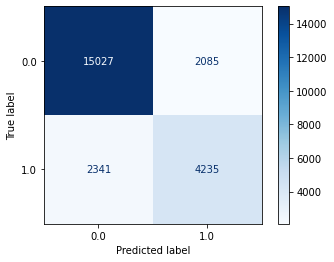

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues')

##Árvore de decisão

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [15]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 0., 0., 0.])

###Métricas

Acurácia

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

0.7904002026342452

Precisão

In [17]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

0.6365485675538227

Recall

In [18]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

0.5710158150851582

###Matriz de confusão

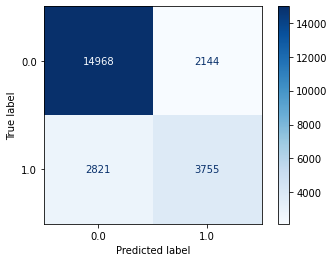

In [19]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)


RandomForestClassifier()

In [21]:
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

0.7978723404255319

Precisão

In [23]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

0.646894511994742

Recall

In [24]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

0.5986922141119222

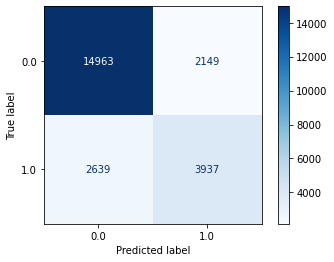

In [25]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB()
nbs.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred_nbs = rdf.predict(x_test)

###Métricas

Acurácia

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_nbs)

0.7978723404255319

Precisão

In [29]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_nbs)

0.646894511994742

Recall

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_nbs)

0.5986922141119222

###Matriz de confusão

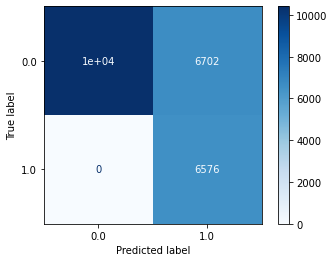

In [31]:
plot_confusion_matrix(nbs,x_test,y_test, cmap='Blues')

##Regressão logística

In [32]:
from sklearn.linear_model import LogisticRegression
rgl = LogisticRegression().fit(x_train, y_train)

In [33]:
y_pred_rgl = rgl.predict(x_test)

###Métricas

Acuracia

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rgl)

0.7239108409321175

Precisão

In [35]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rgl)

0.8461538461538461

Recall

In [36]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rgl)

0.006690997566909975

###Matriz de confusão

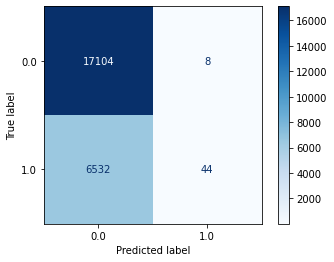

In [37]:
plot_confusion_matrix(rgl,x_test,y_test, cmap='Blues')

#Modelos Engajado

###Divisão entre dados de treinamento e teste

In [38]:
from sklearn.model_selection import train_test_split

cols = ['vlr_saldo','vlr_credito', 'num_produtos', 'qtd_oper']

# Dividindo x e y
x = client[cols]
y = client['ind_engaj']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

###Árvore de decisão

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 1., 1., ..., 0., 0., 0.])

####Métricas

Acurácia

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

0.9806595653109533

Precisão

In [42]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

0.9718640093786636

Recall

In [43]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

0.9719399718618102

####Matriz de confusão

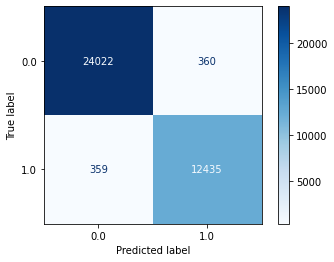

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

###Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)


RandomForestClassifier()

In [46]:
y_pred_rdf = rdf.predict(x_test)

####Métricas

Acurácia

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

0.988998278459221

Precisão

In [48]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

0.9708767394114516

Recall

In [49]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

0.9979677974050336

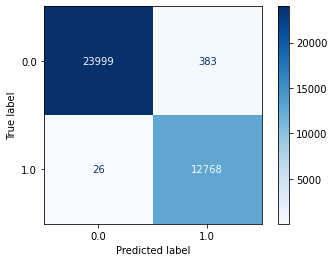

In [50]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')


#Modelos Atritado




## Undersampling de não atritados
Nos próximos modelos, percebemos que existe uma quantidade muita pequena de atritados em relação à base de dados. Por isso, utilizamos técnicas de undersampling e oversampling para estabelecer uma proporção melhor.



In [51]:
import pandas as pd
import numpy as np

cliente_atrito = client[client.ind_atrito == 1]
cliente_atrito

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
92,5135,0.013596,0.006807,0.0,0.894196,0.034483,0.0,0.083019,1.0,0.000000,0.018892,1.0,1.0
4087,259785,0.011070,0.005048,0.0,0.350471,0.011494,0.0,0.026415,0.0,0.000000,0.003612,1.0,0.0
5715,356685,0.035036,0.007745,0.0,0.308646,0.011494,0.0,0.018868,0.0,0.036697,0.026948,1.0,0.0
5753,361057,0.064191,0.031470,0.0,1.117262,0.022989,0.0,0.052830,1.0,0.000000,0.110432,1.0,1.0
7637,480701,0.052269,0.009075,0.0,0.636275,0.011494,0.0,0.052830,0.0,0.000000,0.111821,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173376,11067489,0.022855,0.006331,0.0,0.489887,0.034483,0.0,0.071698,0.0,0.000000,0.024726,1.0,1.0
176941,11288368,0.008752,0.004898,0.0,0.434121,0.011494,0.0,0.083019,1.0,0.018349,0.011529,1.0,0.0
178649,11400484,0.011876,0.004694,0.0,0.692042,0.011494,0.0,0.060377,0.0,0.000000,0.003195,1.0,0.0
184201,11774201,0.008256,0.008337,0.0,0.768721,0.011494,0.0,0.049057,0.0,0.000000,0.009446,1.0,0.0


In [52]:
cliente_not_atrito = client[client.ind_atrito == 0]
cliente_not_atrito

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
0,0,0.001802,0.001837,0.0,0.489887,0.000000,0.0,0.030189,0.0,0.055046,0.003889,0.0,0.0
1,18,0.000432,0.000086,0.0,-1.685013,0.000000,0.0,0.011321,0.0,0.009174,0.002361,0.0,0.0
2,30,0.002952,0.001706,0.0,-0.290846,0.011494,0.0,0.045283,0.0,0.036697,0.005001,0.0,0.0
3,35,0.000083,0.001889,0.0,0.190142,0.000000,0.0,0.022642,0.0,0.009174,0.011529,0.0,0.0
4,85,0.014023,0.000945,0.0,-0.402379,0.000000,0.0,0.116981,0.0,0.027523,0.011113,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185875,11886194,0.002807,0.006070,0.0,-0.221138,0.000000,0.0,0.041509,0.0,0.055046,0.002917,0.0,0.0
185876,11886221,0.027062,0.005580,0.0,1.389125,0.068966,0.0,0.116981,0.0,0.000000,0.008057,0.0,1.0
185877,11886229,0.007014,0.028666,0.0,1.082408,0.045977,0.0,0.026415,0.0,0.000000,0.002084,0.0,1.0
185878,11886303,0.000587,0.001349,0.0,-0.667271,0.000000,0.0,0.033962,0.0,0.009174,0.009168,0.0,0.0


In [53]:
cliente_not_atrito_sample = cliente_not_atrito.sample(frac=.01, random_state=42)
cliente_not_atrito_sample

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
153043,9763395,0.000836,0.003676,0.0,-0.151429,0.011494,0.0,0.011321,0.0,0.027523,0.003334,0.0,0.0
116148,7405981,0.111865,0.002720,0.0,0.406237,0.000000,0.0,0.162264,0.0,0.018349,0.181553,0.0,0.0
4832,305548,0.002696,0.000208,0.0,0.155287,0.000000,0.0,0.037736,0.0,0.000000,0.004167,0.0,0.0
129787,8278816,0.000900,0.001012,0.0,-0.207196,0.045977,0.0,0.071698,0.0,0.000000,0.002084,0.0,1.0
104167,6626067,0.041504,0.000405,0.0,3.403696,0.000000,0.0,0.143396,0.0,0.000000,0.011390,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21933,1386558,0.010020,0.010504,0.0,-1.685013,0.091954,0.0,0.116981,0.0,0.100917,0.009029,0.0,1.0
4234,268802,0.001786,0.004035,0.0,1.012700,0.000000,0.0,0.037736,0.0,0.000000,0.009029,0.0,0.0
81646,5173032,0.003785,0.001600,0.0,-1.719867,0.022989,0.0,0.071698,0.0,0.045872,0.002084,0.0,1.0
45289,2845346,0.003228,0.004529,0.0,-1.608333,0.022989,0.0,0.060377,0.0,0.073394,0.002917,0.0,1.0


In [54]:
client_sample = pd.concat([cliente_atrito, cliente_not_atrito_sample]) 
client_sample

,Unnamed: 0,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr,vlr_renda,ind_atrito,ind_engaj
92,5135,0.013596,0.006807,0.0,0.894196,0.034483,0.0,0.083019,1.0,0.000000,0.018892,1.0,1.0
4087,259785,0.011070,0.005048,0.0,0.350471,0.011494,0.0,0.026415,0.0,0.000000,0.003612,1.0,0.0
5715,356685,0.035036,0.007745,0.0,0.308646,0.011494,0.0,0.018868,0.0,0.036697,0.026948,1.0,0.0
5753,361057,0.064191,0.031470,0.0,1.117262,0.022989,0.0,0.052830,1.0,0.000000,0.110432,1.0,1.0
7637,480701,0.052269,0.009075,0.0,0.636275,0.011494,0.0,0.052830,0.0,0.000000,0.111821,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21933,1386558,0.010020,0.010504,0.0,-1.685013,0.091954,0.0,0.116981,0.0,0.100917,0.009029,0.0,1.0
4234,268802,0.001786,0.004035,0.0,1.012700,0.000000,0.0,0.037736,0.0,0.000000,0.009029,0.0,0.0
81646,5173032,0.003785,0.001600,0.0,-1.719867,0.022989,0.0,0.071698,0.0,0.045872,0.002084,0.0,1.0
45289,2845346,0.003228,0.004529,0.0,-1.608333,0.022989,0.0,0.060377,0.0,0.073394,0.002917,0.0,1.0


##Oversampling de atritados e seleção de colunas a serem utilizadas


In [55]:
from imblearn.over_sampling import SMOTE

cols = ['vlr_saldo','vlr_credito', 'num_atend_atrs', 'qtd_reclm','vlr_renda']

# Dividindo x e y
x = client_sample[cols]
y = client_sample['ind_atrito']

sm = SMOTE(random_state=42, sampling_strategy="auto")
X_res, y_res = sm.fit_resample(x, y)

##Divisão entre dados de treinamento e teste

In [56]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

##KNN 

In [57]:
from sklearn.neighbors import KNeighborsClassifier

kn_n = KNeighborsClassifier(n_neighbors=3)
kn_n.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
y_pred_knn = kn_n.predict(x_test)
y_pred_knn

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0.

###Metricas

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

0.8494623655913979

In [60]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_knn)

0.784841075794621

In [61]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_knn)

0.9304347826086956

###Matriz de confusão

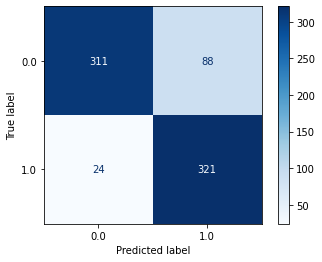

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(kn_n,x_test,y_test, cmap='Blues')

##Árvore de decisão

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [64]:
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0.

###Metricas

Acurácia

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

0.853494623655914

Precisão

In [66]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

0.8314606741573034

Recall

In [67]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

0.8579710144927536

###Matriz de confusão

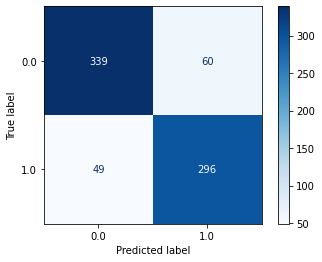

In [68]:
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')

##Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier()
rdf.fit(x_train, y_train)


RandomForestClassifier()

In [70]:
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acuracia

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

0.885752688172043

Precisão

In [72]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

0.8532608695652174

Recall

In [73]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

0.9101449275362319

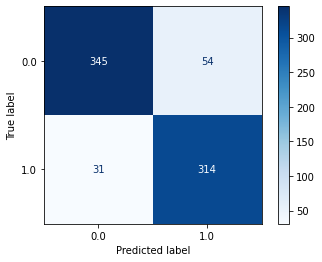

In [74]:
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB()
nbs.fit(x_train, y_train)

GaussianNB()

In [76]:
y_pred_nbs = rdf.predict(x_test)

###Métricas

Acuracia

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_nbs)

0.885752688172043

Precisão

In [78]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_nbs)

0.8532608695652174

Recall

In [79]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_nbs)

0.9101449275362319

###Matriz de confusão

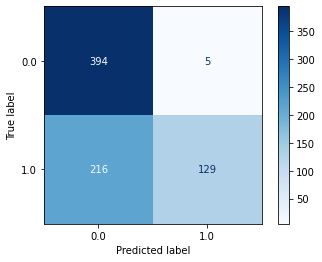

In [80]:
plot_confusion_matrix(nbs,x_test,y_test, cmap='Blues')

##Regressão logística

In [81]:
from sklearn.linear_model import LogisticRegression
rgl = LogisticRegression().fit(x_train, y_train)

In [82]:
y_pred_rgl = rgl.predict(x_test)

###Métricas

Acuracia

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rgl)

0.6989247311827957

Precisão

In [84]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rgl)

0.991869918699187

Recall

In [85]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rgl)

0.3536231884057971

###Matriz de confusão

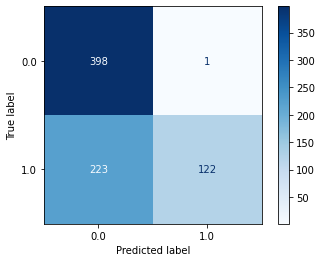

In [86]:
plot_confusion_matrix(rgl,x_test,y_test, cmap='Blues')

##SVM

In [87]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
clf

SVC()

In [88]:
y_pred_clf =clf.predict(x_test)

In [89]:
y_pred_clf

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

### Métricas

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_clf)

0.7016129032258065

In [91]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_clf)

0.9361702127659575

In [92]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_clf)

0.3826086956521739

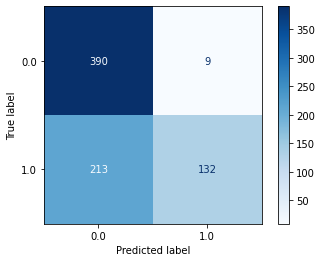

In [93]:
plot_confusion_matrix(clf,x_test,y_test, cmap='Blues')